In [1]:
from cpclasses import *

In [2]:
LJ = LennardJones()
cluster = AtomicCluster(calc = LJ,N=3)


relax(cluster, steps=1000, tol = 1e-6)

#

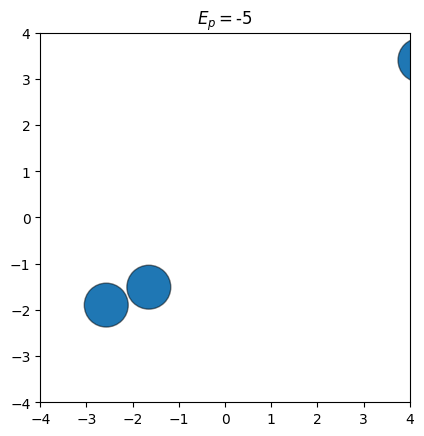

In [3]:
fig, ax = plt.subplots()

ax.set(xlim=(-4, 4), ylim=(-4,4), aspect='equal')

cluster.draw(ax, size=1000, center=True)

In [4]:
def nvt_thermostat(md):
        m = 1
        shape = md.pos.shape
        velocities = np.sqrt(md.kT/m)*np.random.randn(*shape)
        md.set_velocities(velocities)

print(cluster.pos)
nvt_thermostat(cluster)        


[[-2.69050687 -3.38078514]
 [ 3.17853055  1.53281912]
 [-3.612168   -3.76872107]]


In [5]:
print(cluster.pos)
print(cluster.velocities)

[[-2.69050687 -3.38078514]
 [ 3.17853055  1.53281912]
 [-3.612168   -3.76872107]]
[[-0.64935584  0.24109083]
 [ 0.26473805 -0.00181202]
 [ 0.06109249 -0.50112282]]


In [6]:
LJ = LennardJones()
cluster = AtomicCluster(calc = LJ,N=3)


relax(cluster, steps=1000, tol = 1e-6)

print(cluster.potential_energy + cluster.kinetic_energy)
nvt_thermostat(cluster)

velocity_verlet(cluster, N = 50, dt=0.01)
print(cluster.potential_energy + cluster.kinetic_energy)

-5.00058184323472
-4.572022550307947


In [7]:
kT = 0.05

cluster = AtomicCluster(calc = LJ,N=3, kT=kT)
relax(cluster, steps=1000, tol = 1e-6)
energies = []
for _ in range(1000):

    velocity_verlet(cluster, N = 50, dt=0.01)
    
    nvt_thermostat(cluster)
    energy = cluster.potential_energy + cluster.kinetic_energy
    #print(energy)
    energies.append(energy)


In [8]:
print(energies)

[-4.729890929908577, -4.895410816254973, -4.779526553925369, -4.802026416467081, -4.86447689516538, -4.737343384826954, -4.96876510942263, -4.930225971411641, -4.841116503885508, -4.652557132013987, -4.982681721393777, -4.9163831893443, -4.870676449606152, -4.9798173387831755, -5.104648458415317, -5.083978172238478, -5.020929482602511, -5.237613350361867, -5.640416582159273, -8.09823135948687, -8.34245136909898, -9.071791730735612, -9.468674817699938, -9.487390577835564, -9.509788001497325, -10.043287731295488, -10.14033506056188, -10.204502575831167, -10.0470818388916, -10.589230630085204, -13.38919923142153, -14.351393974094862, -14.50980276364115, -14.566308424330398, -14.559232201467122, -14.506348415020772, -14.735794000232003, -14.697569329898062, -14.879165941893804, -14.86496616119374, -14.717206702240096, -14.600794381997934, -14.601835918488433, -14.807731278689623, -14.781067943402176, -14.688267428937936, -14.908525641636075, -14.659119947674272, -14.852379255881358, -14.84

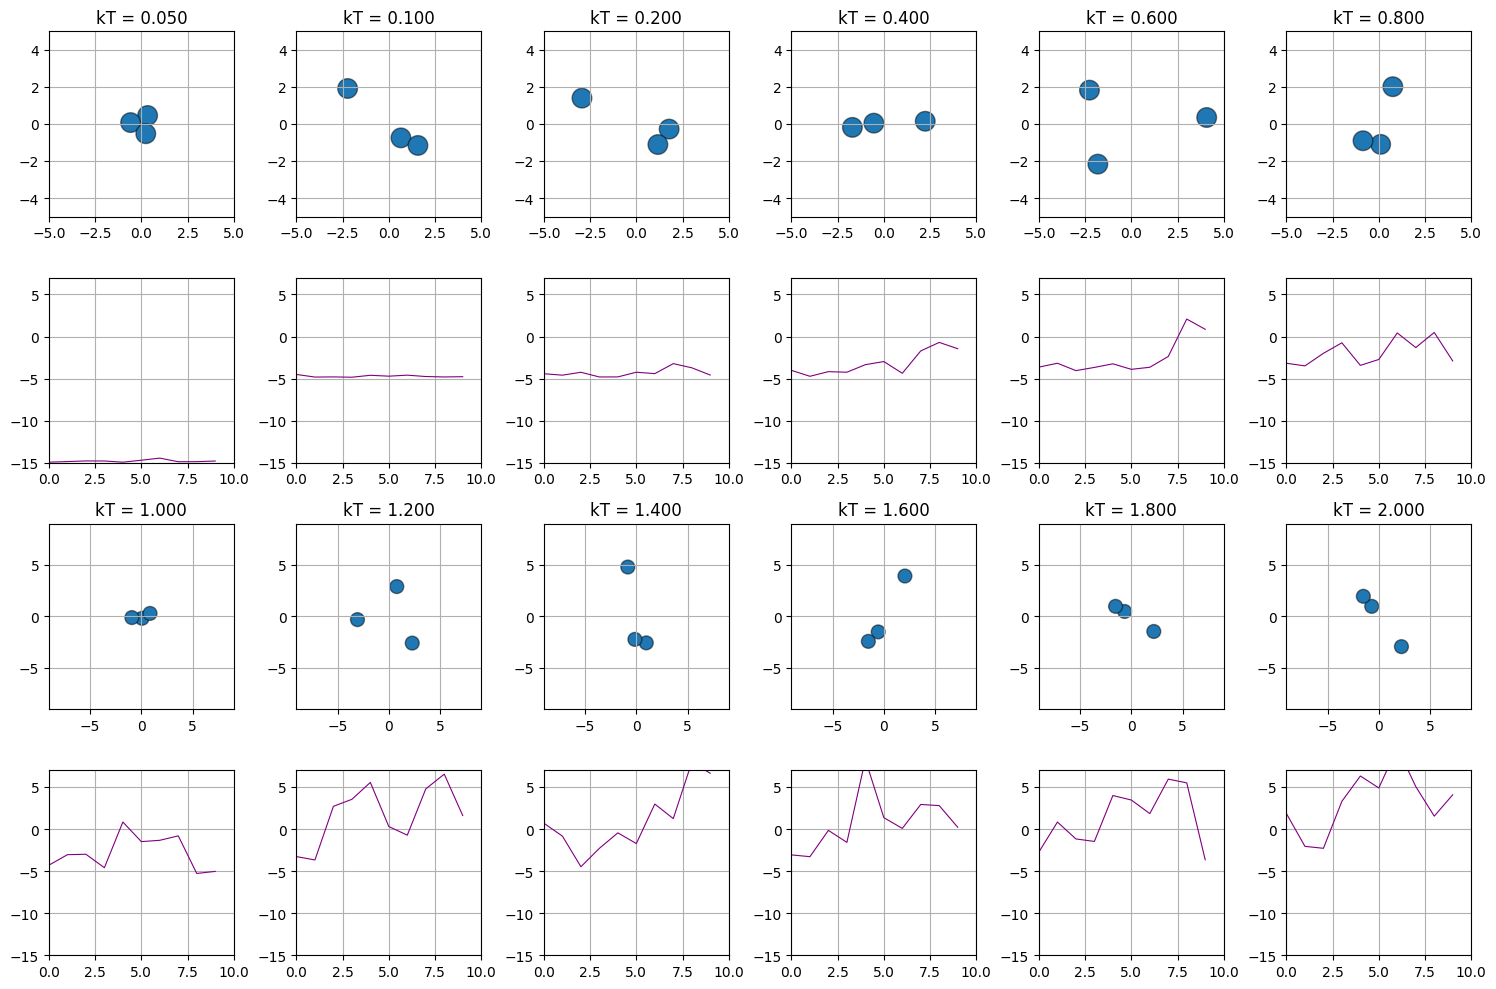

In [9]:
# Set up the figure and axes
fig, axes = plt.subplots(4, 6, figsize=(15, 10))  # 4 rows, 6 columns


N = 10
# Flatten the axes array for easier indexing
axes = axes.flatten()

kTs = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

# Loop through 6 molecules
for i in range(6):


    kT = kTs[i]
    cluster = AtomicCluster(calc = LJ,N=3, kT=kT)
    relax(cluster, steps=100, tol = 1e-5)
    energies = []
    for _ in range(N):

        velocity_verlet(cluster, N = 50, dt=0.01)
        
        nvt_thermostat(cluster)
        energy = cluster.potential_energy + cluster.kinetic_energy
        #print(energy)
        energies.append(energy)



    # Top row (molecule structure)
    ax1 = axes[i]  # Access the i-th subplot
    ax1.set_title(f'KT={0.05 + i*0.15:.3f}')
    cluster.draw(ax1, size=200, center=True)
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-5, 5)
    ax1.set_title(f'kT = {kT:.3f}')
    ax1.grid(True)

    # Second row (energies for the molecule)
    ax2 = axes[i + 6]  # Access the subplot in the second row
    ax2.plot(np.arange(N), energies, color="purple", lw=0.8)
    ax2.set_xlim(0, N)
    ax2.set_ylim(-15, 7)
    ax2.grid(True)

# Third and Fourth row (repeat for other data sets)
for i in range(6):
    kT = kTs[i + 6]
    cluster = AtomicCluster(calc = LJ,N=3, kT=kT)
    relax(cluster, steps=100, tol = 1e-5)
    energies = []
    for _ in range(N):

        velocity_verlet(cluster, N = 50, dt=0.01)
        
        nvt_thermostat(cluster)
        energy = cluster.potential_energy + cluster.kinetic_energy
        #print(energy)
        energies.append(energy)

    # Third row
    ax3 = axes[i + 12]  # Third row
    cluster.draw(ax3, size=100, center=True)
    ax3.set_xlim(-9, 9)
    ax3.set_ylim(-9, 9)
    ax3.set_title(f'kT = {kT:.3f}')
    ax3.grid(True)

    # Fourth row
    ax4 = axes[i + 18]  # Fourth row
    ax4.plot(np.arange(N), energies, color="purple", lw=0.8)
    ax4.set_xlim(0, N)
    ax4.set_ylim(-15, 7)
    ax4.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [10]:


def update(i):
    for i in range(6):


        cluster = clusters[i]
        relax(cluster, steps=100, tol = 1e-5)
        velocity_verlet(cluster, N = 50, dt=0.01)
        
        nvt_thermostat(cluster)
        energy = cluster.potential_energy + cluster.kinetic_energy
        energies[i].append(energy)

        # Top row (molecule structure)
        ax1 = axes[i]  # Access the i-th subplot
        cluster.draw(ax1, size=200, center=True)
        ax1.set_xlim(-5, 5)
        ax1.set_ylim(-5, 5)
        ax1.set_title(f'kT = {kTs[i]:.3f}')
        ax1.set_aspect('equal')
        ax1.grid(True)

        # Second row (energies for the molecule)
        ax2 = axes[i + 6]  # Access the subplot in the second row
        ax2.plot(np.arange(len(energies[i])), energies[i], color="purple", lw=0.8)
        ax2.set_xlim(0, N)
        ax2.set_ylim(-15, 7)
        ax2.grid(True)

    # Third and Fourth row (repeat for other data sets)
    for i in range(6):
        cluster = clusters[i + 6]
        velocity_verlet(cluster, N = 50, dt=0.01)
        
        nvt_thermostat(cluster)
        energy = cluster.potential_energy + cluster.kinetic_energy
    
        energies[i + 6].append(energy)

        # Third row
        ax3 = axes[i + 12]  # Third row
        cluster.draw(ax3, size=100, center=True)
        ax3.set_xlim(-9, 9)
        ax3.set_ylim(-9, 9)
        ax3.set_title(f'kT = {kTs[i+6]:.3f}')
        ax3.set_aspect('equal')
        ax3.grid(True)

        # Fourth row
        ax4 = axes[i + 18]  # Fourth row
        ax4.plot(np.arange(len(energies[i+6])), energies[i+6], color="purple", lw=0.8)
        ax4.set_xlim(0, N)
        ax4.set_ylim(-15, 7)
        ax4.grid(True)

        

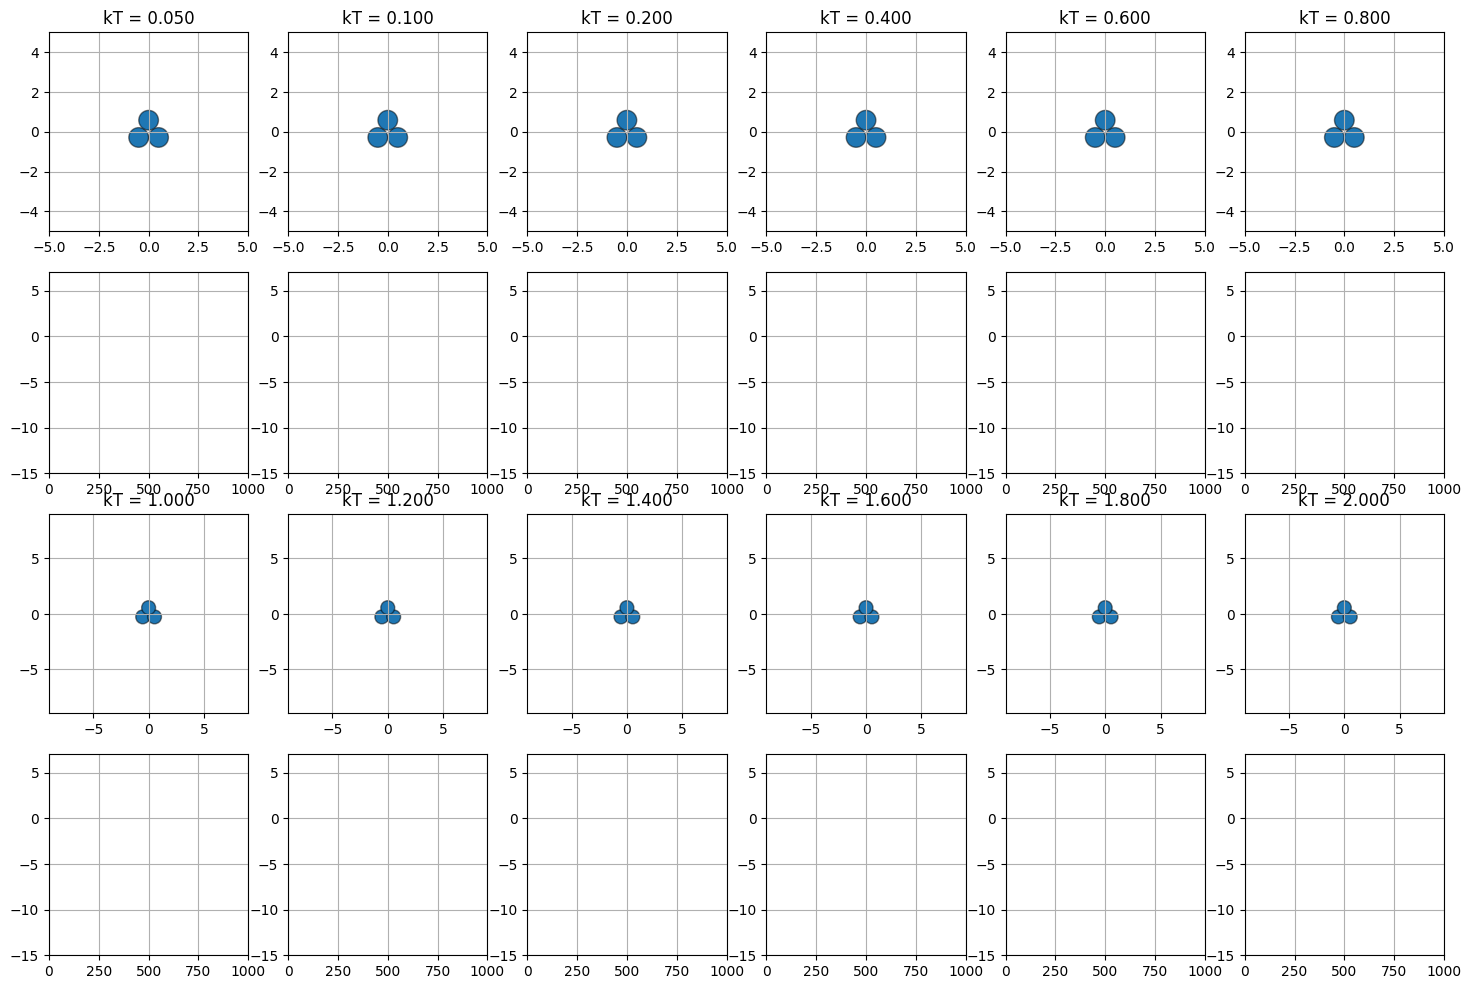

In [11]:
N = 1000
pos = [[-0.5, -0.5], [0.5, -0.5], [0, 0.5]]
clusters = [AtomicCluster(calc = LJ,pos = pos, kT = kT) for kT in kTs]
#for cluster in clusters:
#    relax(cluster, steps=1000, tol = 1e-6)

energies = [[] for _ in range(12)]

fig, axes = plt.subplots(4, 6, figsize=(18, 12))  # 4 rows, 6 columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

update(0)

In [ ]:
from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, update, frames=1000, repeat=False)

save_animation(anim,'molecular_dynamics.gif', writer='pillow', fps=100)